In [1]:
import itertools as it

import matplotlib.pyplot as plt
import numpy as np
import time

from day21.part2.failed_attempts.solution import *

In [2]:
with open('../input.txt') as fp:
    lines = [line.rstrip('\n') for line in fp]

In [27]:
map, locations = parse_input(lines)

In [28]:
n_locations = []
times = []

for _ in range(400):
    t_start = time.time()
    locations = step(map, locations)
    t_end = time.time()
    n_locations.append(len(locations))
    times.append(t_end - t_start)

In [34]:
np.savetxt('n_locations.txt', n_locations)

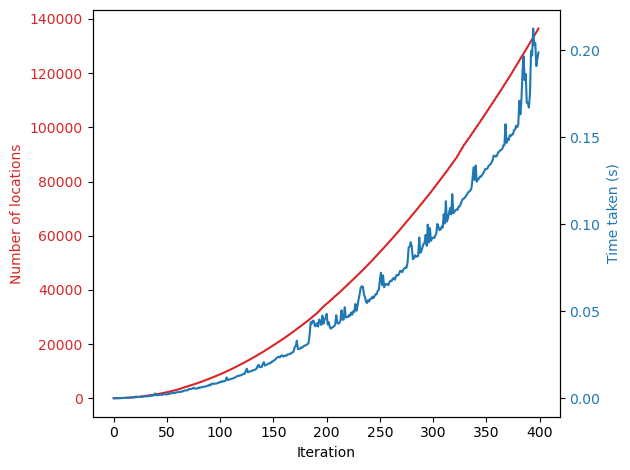

In [29]:
# Plot the number of locations and the time taken

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Number of locations', color=color)
ax1.plot(n_locations, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Time taken (s)', color=color)
ax2.plot(times, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

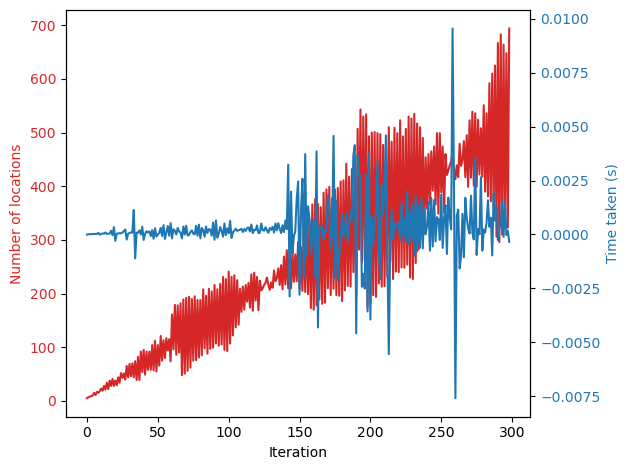

In [6]:
# Also plot the deltas between t and t+1

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Number of locations', color=color)
ax1.plot(np.diff(n_locations), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Time taken (s)', color=color)
ax2.plot(np.diff(times), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [21]:
def step2(map: np.ndarray, locations: np.ndarray) -> np.ndarray:
    """Perform one step of the simulation.
    
    Args:
        input_array: The 2d input array (<U1 dtype).
        locations_array: The array of sets of repetition coordinates.
        
    Returns:
        The new set of possible locations."""
    height, width = map.shape
    new_locations = np.array([set() for _ in range(height * width)], dtype=object).reshape(height, width)
    for i, j in it.product(range(height), range(width)):
        set_ij = locations[i, j]
        if len(set_ij) > 0:
            # Check up
            imod, jmod = (i - 1) % height, j % width
            if map[imod, jmod] == '.':
                if i > 0:
                    new_locations[imod, jmod].update(set_ij)
                else:
                    new_locations[height - 1, jmod].update(set((k - 1, l) for k, l in set_ij))
            # Check right
            imod, jmod = i % height, (j + 1) % width
            if map[imod, jmod] == '.':
                if j < width - 1:
                    new_locations[imod, jmod].update(set_ij)
                else:
                    new_locations[imod, 0].update(set((k, l + 1) for k, l in set_ij))
            # Check down
            imod, jmod = (i + 1) % height, j % width
            if map[imod, jmod] == '.':
                if i < height - 1:
                    new_locations[imod, jmod].update(set_ij)
                else:
                    new_locations[0, jmod].update(set((k + 1, l) for k, l in set_ij))
            # Check left
            imod, jmod = i % height, (j - 1) % width
            if map[imod, jmod] == '.':
                if j > 0:
                    new_locations[imod, jmod].update(set_ij)
                else:
                    new_locations[imod, width - 1].update(set((k, l - 1) for k, l in set_ij))
    return new_locations


def parse_input2(lines: Sequence[str]) -> tuple[np.ndarray, np.ndarray]:
    """Parse the input into a suitable datastructure.
    
    Args:
        lines: The newline-stripped input lines.
        
    Returns:
        map: The 2d map array (<U1 dtype).
        locations: The 2d array of locations (object dtype).
        Each entry is the (python) set of indices of repetitions of that location."""
    array = np.array([list(line) for line in lines])
    height, width = array.shape
    locations = np.array([set() for _ in range(height * width)], dtype=object).reshape(height, width)
    locations[array == 'S'].item().add((0, 0))  # Add start location
    array[array == 'S'] = '.'  # Replace start with garden tile
    return array, locations

In [10]:
def count_locations(locations):
    return sum(len(s) for s in locations.flatten())

In [30]:
map2, locations2 = parse_input2(lines)

n_locations = []
times = []

for _ in range(5000):
    t_start = time.time()
    locations2 = step2(map2, locations2)
    t_end = time.time()
    n_locations.append(count_locations(locations2))
    times.append(t_end - t_start)

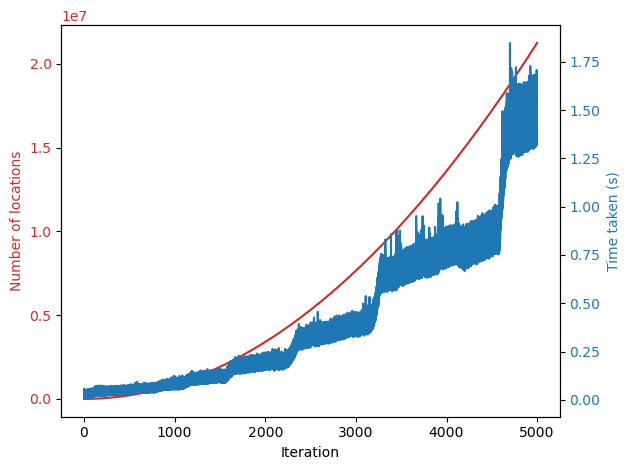

In [31]:
# Plot the number of locations and the time taken

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Number of locations', color=color)
ax1.plot(n_locations, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Time taken (s)', color=color)
ax2.plot(times, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()